In [170]:
import pandas as pd
import plotly.express as pltx
import seaborn as sns
import numpy as np


In [171]:
df = pd.read_csv("../Data/customer_dataset.csv")
df.head()

,Customer_ID,Gender,Age,City,Membership_Type,Total_Spend,Items_Purchased,Average_Rating,Discount_Applied,Days_Since_Last_Purchase,Satisfaction_Level
0,101,Female,29,New York,Gold,1120.20,14,4.6,True,25,Satisfied
1,102,Male,34,Los Angeles,Silver,780.50,11,4.1,False,18,Neutral
2,103,Female,43,Chicago,Bronze,510.75,9,3.4,True,42,Unsatisfied
3,104,Male,30,San Francisco,Gold,1480.30,19,4.7,False,12,Satisfied
4,105,Male,27,Miami,Bronze,720.40,13,4.0,True,55,Unsatisfied


In [172]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer_ID               350 non-null    int64  
 1   Gender                    350 non-null    object 
 2   Age                       350 non-null    int64  
 3   City                      350 non-null    object 
 4   Membership_Type           350 non-null    object 
 5   Total_Spend               350 non-null    float64
 6   Items_Purchased           350 non-null    int64  
 7   Average_Rating            350 non-null    float64
 8   Discount_Applied          350 non-null    bool   
 9   Days_Since_Last_Purchase  350 non-null    int64  
 10  Satisfaction_Level        349 non-null    object 
dtypes: bool(1), float64(2), int64(4), object(4)
memory usage: 27.8+ KB


In [173]:
df.dtypes


Customer_ID                   int64
Gender                       object
Age                           int64
City                         object
Membership_Type              object
Total_Spend                 float64
Items_Purchased               int64
Average_Rating              float64
Discount_Applied               bool
Days_Since_Last_Purchase      int64
Satisfaction_Level           object
dtype: object

In [174]:
df.isnull().sum()


Customer_ID                 0
Gender                      0
Age                         0
City                        0
Membership_Type             0
Total_Spend                 0
Items_Purchased             0
Average_Rating              0
Discount_Applied            0
Days_Since_Last_Purchase    0
Satisfaction_Level          1
dtype: int64

In [ ]:

df.describe()

,Customer_ID,Age,Total_Spend,Items_Purchased,Average_Rating,Days_Since_Last_Purchase
count,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000
mean,275.500000,33.597143,845.381714,12.600000,4.019143,26.588571
std,101.180532,4.870882,362.058695,4.155984,0.580539,13.440813
min,101.000000,26.000000,410.800000,7.000000,3.000000,9.000000
25%,188.250000,30.000000,502.000000,9.000000,3.500000,15.000000
50%,275.500000,32.500000,775.200000,12.000000,4.100000,23.000000
75%,362.750000,37.000000,1160.600000,15.000000,4.500000,38.000000
max,450.000000,43.000000,1520.100000,21.000000,4.900000,63.000000


In [176]:
df.drop(columns=['Customer_ID'], inplace=True)

df.head()

,Gender,Age,City,Membership_Type,Total_Spend,Items_Purchased,Average_Rating,Discount_Applied,Days_Since_Last_Purchase,Satisfaction_Level
0,Female,29,New York,Gold,1120.20,14,4.6,True,25,Satisfied
1,Male,34,Los Angeles,Silver,780.50,11,4.1,False,18,Neutral
2,Female,43,Chicago,Bronze,510.75,9,3.4,True,42,Unsatisfied
3,Male,30,San Francisco,Gold,1480.30,19,4.7,False,12,Satisfied
4,Male,27,Miami,Bronze,720.40,13,4.0,True,55,Unsatisfied


In [ ]:
age_bins = [20, 25, 30, 35, 40, 45, float('inf')]
age_labels = ['20-24', '25-29', '30-34', '35-39', '40-44', '45+']

df['AgeBin'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)

age_counts = df['AgeBin'].value_counts().sort_index().reset_index()
age_counts.columns = ['Age Group', 'Age Group Count']

plot = pltx.bar(
    age_counts,
    x='Age Group',
    y='Age Group Count',
    title="Age Group Distribution of Customers",
    text='Age Group Count',
    color='Age Group'
)

plot.update_layout(
    xaxis_title="Age Group",
    yaxis_title="Age Group Count",
    xaxis={'categoryorder': 'array', 'categoryarray': age_labels}
)

# Show plot
plot.show()

In [178]:
age_gender_dist = df.groupby(['Gender', 'AgeBin'])['Gender'].size().reset_index(name='Count')

fig = pltx.line(
    age_gender_dist, 
    x="AgeBin", 
    y="Count", 
    color="Gender", 
    markers=True, 
    title="Age Distribution By Gender"
)

fig.update_xaxes(title="Age Group")
fig.update_yaxes(title="Count")

fig.show()

C:\Users\yatik\AppData\Local\Temp\ipykernel_17400\3267321076.py:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [179]:
df['Age'].describe()

count    350.000000
mean      33.597143
std        4.870882
min       26.000000
25%       30.000000
50%       32.500000
75%       37.000000
max       43.000000
Name: Age, dtype: float64

In [180]:
location_dist = df['City'].value_counts()

fig = pltx.pie(
    names=location_dist.index,
    values=location_dist.values,
    title="Location Distribution",
    hole=0.4,  
    color_discrete_sequence=pltx.colors.qualitative.Set3
)

fig.show()

In [181]:
items_purchased_gender = df.groupby("Gender")["Items_Purchased"].mean().reset_index()

fig = pltx.bar(
    items_purchased_gender,
    x="Gender",
    y="Items_Purchased",
    title="Average Items Purchased by Gender",
    color="Gender",
    text_auto=True
)

fig.update_xaxes(title="Gender")
fig.update_yaxes(title="Average Items Buy")
fig.show()

In [182]:
rating_vs_items = df.groupby("Average_Rating")["Items_Purchased"].mean().reset_index()

# Create bar chart
fig = pltx.bar(
    rating_vs_items,
    x="Average_Rating",
    y="Items_Purchased",
    title="Average Items Purchased by Rating",
    labels={"Average_Rating": "Average Rating", "Items_Purchased": "Average Items Purchased"},
    text_auto=True,
    color="Items_Purchased",
    color_continuous_scale="Blues"
)

fig.show()

In [183]:
gender_items_avg = df.groupby("Gender")["Items_Purchased"].mean().reset_index()

# Create pie chart
fig = pltx.pie(
    gender_items_avg, 
    names="Gender", 
    values="Items_Purchased", 
    title="Average Items Purchased by Gender",
    color_discrete_sequence=pltx.colors.qualitative.Set3
)

fig.show()

In [184]:
if df["Satisfaction_Level"].dtype == "object":
    df["Satisfaction_Level"] = df["Satisfaction_Level"].astype("category").cat.codes

# Group by City and calculate the average Satisfaction Level
city_vs_satisfaction = df.groupby("City")["Satisfaction_Level"].mean().reset_index()

# Create pie chart
fig = pltx.pie(
    city_vs_satisfaction, 
    names="City", 
    values="Satisfaction_Level", 
    title="Average Satisfaction Level by City",
    hole=0.4,  # Donut style for better visualization
    color_discrete_sequence=pltx.colors.qualitative.Set3
)

fig.show()

In [ ]:
city_vs_items = df.groupby("City")["Items_Purchased"].sum().reset_index()

# Create bar chart
fig = pltx.bar(
    city_vs_items,
    x="City",
    y="Items_Purchased",
    title="Total Items Purchased by City",
    labels={"City": "City", "Items_Purchased": "Total Items Purchased"},
    text_auto=True,
    color="Items_Purchased",
    color_continuous_scale="Blues"
)

fig.update_xaxes(categoryorder="total descending")  # Sort cities by total items purchased

fig.show()

In [ ]:
gender_membership = df.groupby(["Gender", "Membership_Type"]).size().reset_index(name="Count")

# Create a bar chart
fig = pltx.bar(
    gender_membership, 
    x="Gender", 
    y="Count", 
    color="Membership_Type", 
    title="Gender vs Membership Type Distribution",
    barmode="group",
    labels={"Count": "Number of Customers", "Gender": "Gender"}
)

fig.show()

In [ ]:
gender_avg_rating = df.groupby("Gender")["Average_Rating"].mean().reset_index()

# Create bar chart
fig = pltx.bar(
    gender_avg_rating,
    x="Gender",
    y="Average_Rating",
    title="Average Rating by Gender",
    labels={"Average_Rating": "Average Rating", "Gender": "Gender"},
    text_auto=True,
    color="Gender",
    color_discrete_sequence=pltx.colors.qualitative.Set3
)

fig.show()

In [188]:
city_membership = df.groupby(["City", "Membership_Type"]).size().reset_index(name="Count")

# Create a bar chart
fig = pltx.bar(
    city_membership, 
    x="City", 
    y="Count", 
    color="Membership_Type", 
    title="Membership Type Distribution by City",
    barmode="group",
    labels={"Count": "Number of Customers", "City": "City"}
)

fig.show()

In [ ]:
city_days_purchase = df.groupby("City")["Days_Since_Last_Purchase"].mean().reset_index()

# Create bar chart
fig = pltx.bar(
    city_days_purchase,
    x="City",
    y="Days_Since_Last_Purchase",
    title="Average Days Since Last Purchase by City",
    labels={"City": "City", "Days_Since_Last_Purchase": "Avg Days Since Last Purchase"},
    color="Days_Since_Last_Purchase",
    color_continuous_scale="Blues"
)

fig.update_xaxes(categoryorder="total descending")  # Sort cities by avg days since last purchase

fig.show()

In [ ]:
gender_items_purchased = df.groupby("Gender")["Items_Purchased"].sum().reset_index()
fig = pltx.pie(
    gender_items_purchased,
    names="Gender",
    values="Items_Purchased",
    title="Percentage of Items Purchased by Gender",
    color_discrete_sequence=pltx.colors.qualitative.Set3
)

fig.show()

In [ ]:
membership_spend = df.groupby("Membership_Type")["Total_Spend"].sum().reset_index()

# Create bar chart
fig = pltx.bar(
    membership_spend,
    x="Membership_Type",
    y="Total_Spend",
    title="Total Spend by Membership Type",
    labels={"Membership_Type": "Membership Type", "Total_Spend": "Total Spend"},
    text_auto=True,
    color="Total_Spend",
    color_continuous_scale="Blues"
)

fig.show()

In [192]:
df["AgeGroup"] = pd.cut(df["Age"], bins=age_bins, labels=age_labels, right=False)

# Create violin plot
fig = pltx.violin(
    df, 
    x="Membership_Type", 
    y="Age", 
    color="Membership_Type",
    box=True,  
    points="all",
    title="Age Group Distribution by Membership Type",
    labels={"Membership_Type": "Membership Type", "Age": "Age"}
)

fig.show()

In [193]:
membership_age = df.groupby(["Membership_Type", "Age"]).size().reset_index(name="Count")

# Create bar chart
fig = pltx.bar(
    membership_age,
    x="Age",
    y="Count",
    color="Membership_Type",
    title="Distribution of Age by Membership Type",
    labels={"Age": "Age", "Count": "Number of Customers"},
    barmode="group",
    color_discrete_sequence=pltx.colors.qualitative.Set3
)

fig.show()

In [194]:
gender_satisfaction = df.groupby(["Gender", "Satisfaction_Level"]).size().reset_index(name="Count")

# Create bar chart
fig = pltx.bar(
    gender_satisfaction,
    x="Gender",
    y="Count",
    color="Satisfaction_Level",
    title="Satisfaction Level Distribution by Gender",
    labels={"Gender": "Gender", "Count": "Number of Customers", "Satisfaction_Level": "Satisfaction Level"},
    barmode="group",
    color_discrete_sequence=pltx.colors.qualitative.Set3
)

fig.show()

In [ ]:
import seaborn as sns
for col in df.select_dtypes(include=['object']).columns:
    df[col] = pd.Categorical(df[col]).codes

# Compute correlation matrix
df_correlation = df.corr(numeric_only=True)

# Create heatmap for correlation matrix
fig = pltx.imshow(
    df_correlation,
    title="Correlation Matrix Heatmap",
    labels=dict(color="Correlation"),
    color_continuous_scale="Viridis"
)

fig.show()

In [ ]:
for col in df.select_dtypes(include=['object']).columns:
    df[col] = pd.Categorical(df[col]).codes

# Compute correlation matrix
df_correlation = df.corr(numeric_only=True)

# Select correlations with Total Spend
features = df_correlation["Total_Spend"].sort_values(ascending=False).drop("Total_Spend")

# Create bar chart
fig = pltx.bar(
    x=features.index,
    y=features.values,
    title="Feature Correlation with Total Spend",
    color=features.values,
    color_continuous_scale="Cividis"
)

# Add annotations for exact correlation values
for i in range(len(features)):
    fig.add_annotation(
        x=features.index[i],
        y=features.values[i],
        text=f"{features.values[i]:.2f}",
        yshift=-10 if features.values[i] < 0 else 10,
        showarrow=False,
    )

fig.update_layout(xaxis_title="Feature", yaxis_title="Correlation")

fig.show()

In [197]:
for col in df.select_dtypes(include=['object']).columns:
    df[col] = pd.Categorical(df[col]).codes

# Compute correlation matrix
df_correlation = df.corr(numeric_only=True)

# Select correlations with Satisfaction Level
features = df_correlation["Satisfaction_Level"].sort_values(ascending=True).drop("Satisfaction_Level")

# Create horizontal bar chart
fig = pltx.bar(
    x=features.values,
    y=features.index,
    title="Feature Correlation with Satisfaction Level",
    color=features.values,
    orientation="h",
    color_continuous_scale="Plasma"
)

# Add annotations for exact correlation values
for i in range(len(features)):
    fig.add_annotation(
        x=features.values[i],
        y=features.index[i],
        text=f"{features.values[i]:.2f}",
        xshift=10 if features.values[i] > 0 else -10,
        showarrow=False,
    )

fig.update_layout(xaxis_title="Correlation", yaxis_title="Feature")

fig.show()

In [ ]:

import plotly.graph_objects as go

for col in df.select_dtypes(include=['object']).columns:
    df[col] = pd.Categorical(df[col]).codes

# Compute correlation matrix
df_correlation = df.corr(numeric_only=True)

# Extract correlations with Age & Items Purchased
age_corr = df_correlation["Age"].sort_values(ascending=False).drop("Age")
items_corr = df_correlation["Items_Purchased"].sort_values(ascending=False).drop("Items_Purchased")

# Create grouped bar chart
fig = go.Figure()

fig.add_trace(go.Bar(
    x=age_corr.index,
    y=age_corr.values,
    name="Correlation with Age",
    marker_color="blue"
))

fig.add_trace(go.Bar(
    x=items_corr.index,
    y=items_corr.values,
    name="Correlation with Items Purchased",
    marker_color="orange"
))

# Update layout
fig.update_layout(
    title="Feature Correlation with Age & Items Purchased",
    xaxis_title="Feature",
    yaxis_title="Correlation",
    barmode="group"
)

fig.show()

In [ ]:
from plotly.subplots import *

features = [
    "Total_Spend",
    "Items_Purchased",
    "Average_Rating",
    "Days_Since_Last_Purchase",
]

# Compute descriptive statistics grouped by Gender
gender_stats = df.groupby("Gender")[features].describe().reset_index()

# Create subplots (2 rows, 2 columns)
fig = make_subplots(
    rows=2,
    cols=2,
    subplot_titles=features,
)

# Add mean and standard deviation bars for each feature
for i, feature in enumerate(features):
    fig.add_trace(
        go.Bar(
            x=gender_stats["Gender"],
            y=gender_stats[(feature, "mean")],
            name="Mean",
        ),
        row=(i // 2) + 1,
        col=(i % 2) + 1,
    )

    fig.add_trace(
        go.Bar(
            x=gender_stats["Gender"],
            y=gender_stats[(feature, "std")],
            name="Std",
        ),
        row=(i // 2) + 1,
        col=(i % 2) + 1,
    )

# Update layout
fig.update_layout(
    title="Customer Statistics by Gender",
    showlegend=False,
)

fig.update_yaxes(title_text="Mean", row=1, col=1)
fig.update_yaxes(title_text="Std", row=2, col=1)

fig.show()

In [200]:
features = [
    "Total_Spend",
    "Items_Purchased",
    "Average_Rating",
    "Days_Since_Last_Purchase",
]

# Compute descriptive statistics grouped by Membership Type
membership_stats = df.groupby("Membership_Type")[features].describe().reset_index()

# # Create subplots (2 rows, 2 columns)
# fig = make_subplots(
#     rows=2,
#     cols=2,
#     subplot_titles=features,
# )

# Add mean and standard deviation bars for each feature
for i, feature in enumerate(features):
    fig.add_trace(
        go.Bar(
            x=membership_stats["Membership_Type"],
            y=membership_stats[(feature, "mean")],
            name="Mean",
        ),
        row=(i // 2) + 1,
        col=(i % 2) + 1,
    )

    fig.add_trace(
        go.Bar(
            x=membership_stats["Membership_Type"],
            y=membership_stats[(feature, "std")],
            name="Std",
        ),
        row=(i // 2) + 1,
        col=(i % 2) + 1,
    )

# Update layout
fig.update_layout(
    title="Customer Statistics by Membership Type",
    showlegend=False,
)

fig.update_yaxes(title_text="Mean", row=1, col=1)
fig.update_yaxes(title_text="Std", row=2, col=1)

fig.show()

In [201]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler  

In [202]:
dk = df.drop(columns=['Satisfaction_Level'], errors='ignore')
categorical_features = ['Membership_Type']
numerical_features = ['Total_Spend', 'Items_Purchased', 'Average_Rating', 'Days_Since_Last_Purchase', 'Age']


In [203]:
for col in categorical_features:
    dk[col] = pd.Categorical(dk[col]).codes

# Standardize numerical features
scaler = StandardScaler()
dk[numerical_features] = scaler.fit_transform(dk[numerical_features])

# Display the transformed dataset
dk.head()

,Gender,Age,City,Membership_Type,Total_Spend,Items_Purchased,Average_Rating,Discount_Applied,Days_Since_Last_Purchase,AgeBin,AgeGroup
0,0,-0.945152,4,1,0.760130,0.337346,1.001981,True,-0.118359,25-29,25-29
1,1,0.082826,2,2,-0.179459,-0.385538,0.139479,False,-0.639907,30-34,30-34
2,0,1.933185,0,0,-0.925570,-0.867461,-1.068024,True,1.148256,40-44,40-44
3,1,-0.739557,5,1,1.756144,1.542153,1.174482,False,-1.086947,30-34,30-34
4,1,-1.356343,3,0,-0.345692,0.096385,-0.033022,True,2.116844,25-29,25-29


In [211]:
dk = df.drop(columns=['Satisfaction_Level'], errors='ignore')

# Identify categorical and numerical features
categorical_features = ['Gender', 'Membership_Type', 'City']
numerical_features = ['Total_Spend', 'Items_Purchased', 'Average_Rating', 'Days_Since_Last_Purchase']

# ✅ Convert Age Group (e.g., '20-24') to Numeric Values
if df['Age'].dtype == 'object':  
    age_mapping = {label: idx for idx, label in enumerate(sorted(df['Age'].unique()))}
    dk['Age'] = df['Age'].map(age_mapping)

# ✅ Convert categorical variables to numeric codes
for col in categorical_features:
    dk[col] = pd.Categorical(dk[col]).codes

# Standardize numerical features
scaler = StandardScaler()
dk[numerical_features] = scaler.fit_transform(dk[numerical_features])

# Initialize lists to store inertia and silhouette scores
inertia = []
silhouette_scores = []
k_range = range(2, 8)  # Testing different cluster numbers

# Train K-Means with different cluster sizes
for k in k_range:
    print(f"Training KMeans with {k} clusters")
    k_means = KMeans(n_clusters=k, random_state=42, n_init=10)
    k_means.fit(dk)
    inertia_ = k_means.inertia_
    silhouette_scores_ = silhouette_score(dk, k_means.labels_)
    inertia.append(inertia_)
    silhouette_scores.append(silhouette_scores_)
    print("Inertia:", inertia_)
    print("Silhouette Score:", silhouette_scores_)
    print("")

Training KMeans with 2 clusters
Inertia: 904304.5455434138
Silhouette Score: 0.6186782097557806

Training KMeans with 3 clusters
Inertia: 408193.61564556835
Silhouette Score: 0.574728029061651

Training KMeans with 4 clusters
Inertia: 234481.4587836321
Silhouette Score: 0.5477332643433899

Training KMeans with 5 clusters
Inertia: 154153.32132675496
Silhouette Score: 0.5276767448751806

Training KMeans with 6 clusters
Inertia: 110387.4722503905
Silhouette Score: 0.5100837311523089

Training KMeans with 7 clusters
Inertia: 84102.5292010213
Silhouette Score: 0.4935405962714986



In [212]:
fig = pltx.line(
    x=k_range,
    y=inertia,
    title="Inertia vs Number of Clusters",
    labels={"x": "Number of Clusters", "y": "Inertia"},
)

fig.show()

In [ ]:
fig = pltx.line(
    x=k_range,
    y=silhouette_scores,
    title="Score vs Clusters",
    labels={"x": "Clusters", "y": "Score"},
)

fig.show()

In [ ]:
levels = df["Satisfaction_Level"].value_counts()

# Create Pie Chart
fig = pltx.pie(
    names=levels.index,
    values=levels.values,
    title="Satisfaction Level Distribution",
    color=levels.index
)

fig.show()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression

X = df.drop(columns=["Satisfaction_Level"], errors='ignore')
y = df["Satisfaction_Level"]

# Encode categorical target variable (if necessary)
y = LabelEncoder().fit_transform(y)

# Identify categorical and numerical features
categorical_features = ["Gender", "Membership_Type", "City"]
numerical_features = ["Total_Spend", "Items_Purchased", "Average_Rating", "Days_Since_Last_Purchase", "Age"]

# Encode categorical features
for col in categorical_features:
    X[col] = LabelEncoder().fit_transform(X[col])

# Standardize numerical features
scaler = StandardScaler()
X[numerical_features] = scaler.fit_transform(X[numerical_features])

# Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define classification models
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "SVM": SVC(),
    "Naive Bayes": GaussianNB(),
    "KNN": KNeighborsClassifier(),
}

# Print dataset shape
print(f"X_train shape: {X_train.shape}, X_test shape: {X_test.shape}, y_train shape: {y_train.shape}, y_test shape: {y_test.shape}")

X_train shape: (280, 10), X_test shape: (70, 10), y_train shape: (280,), y_test shape: (70,)


In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer


X = df.drop(columns=["Satisfaction_Level"], errors='ignore')
y = df["Satisfaction_Level"]

# Identify categorical and numerical features
categorical_features = ["Gender", "Membership_Type", "City"]
numerical_features = ["Total_Spend", "Items_Purchased", "Average_Rating", "Days_Since_Last_Purchase", "Age"]

# Split dataset into training & testing sets (80%-20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ✅ Apply Preprocessing (Scaling & One-Hot Encoding)
preprocessor = ColumnTransformer(
    transformers=[
        ("standard_scaler", StandardScaler(), numerical_features),
        ("one_hot_encoder", OneHotEncoder(handle_unknown='ignore'), categorical_features),
    ]
).fit(X_train)

# Transform feature sets
X_train = preprocessor.transform(X_train)
X_test = preprocessor.transform(X_test)

# ✅ Encode target variable
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

# Print confirmation
print("Preprocessing Completed ✅")

Preprocessing Completed ✅


In [223]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

import time

X = df.drop(columns=["Satisfaction_Level"], errors='ignore')
y = df["Satisfaction_Level"]

# Identify categorical and numerical features
categorical_features = ["Gender", "Membership_Type", "City"]
numerical_features = ["Total_Spend", "Items_Purchased", "Average_Rating", "Days_Since_Last_Purchase", "Age"]

# Split dataset into training & testing sets (80%-20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ✅ Apply Preprocessing (Scaling & One-Hot Encoding)
preprocessor = ColumnTransformer(
    transformers=[
        ("standard_scaler", StandardScaler(), numerical_features),
        ("one_hot_encoder", OneHotEncoder(handle_unknown='ignore'), categorical_features),
    ]
).fit(X_train)


In [ ]:

# Transform feature sets
X_train = preprocessor.transform(X_train)
X_test = preprocessor.transform(X_test)

# ✅ Encode target variable
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

# ✅ Define Machine Learning Models
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "SVM": SVC(),
    "Naive Bayes": GaussianNB(),
    "KNN": KNeighborsClassifier(),
}

# ✅ Train Models & Measure Training Time
for model_name, model in models.items():
    print(f"Training {model_name}")
    start_time = time.time()
    model.fit(X_train, y_train)
    end_time = time.time()
    print(f"Training {model_name} complete time taken: {end_time - start_time:.2f} seconds\n")

Training Logistic Regression
Training Logistic Regression complete time taken: 0.07 seconds

Training Random Forest
Training Random Forest complete time taken: 0.25 seconds

Training Gradient Boosting
Training Gradient Boosting complete time taken: 0.76 seconds

Training SVM
Training SVM complete time taken: 0.01 seconds

Training Naive Bayes
Training Naive Bayes complete time taken: 0.00 seconds

Training KNN
Training KNN complete time taken: 0.00 seconds



In [ ]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, mean_absolute_error


X = df.drop(columns=["Satisfaction_Level"], errors='ignore')
y = LabelEncoder().fit_transform(df["Satisfaction_Level"])

# Preprocessing: Scaling & Encoding
categorical_features = ["Gender", "Membership_Type", "City"]
numerical_features = ["Total_Spend", "Items_Purchased", "Average_Rating", "Days_Since_Last_Purchase", "Age"]

preprocessor = ColumnTransformer([
    ("scale", StandardScaler(), numerical_features),
    ("encode", OneHotEncoder(handle_unknown='ignore'), categorical_features)
])

X_train, X_test, y_train, y_test = train_test_split(preprocessor.fit_transform(X), y, test_size=0.2, random_state=42)

# Models
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "SVM": SVC(),
    "Naive Bayes": GaussianNB(),
    "KNN": KNeighborsClassifier(),
}

# Train models & collect results
results = {}
for name, model in models.items():
    start = time.time()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_train)
    results[name] = {
        "Accuracy": accuracy_score(y_train, y_pred),
        "F1": f1_score(y_train, y_pred, average='weighted'),
        "Recall": recall_score(y_train, y_pred, average='weighted'),
        "Precision": precision_score(y_train, y_pred, average='weighted'),
        "MAE": mean_absolute_error(y_train, y_pred),
        "Time": round(time.time() - start, 2),
    }

# Convert to DataFrame & Visualize
results_df = pd.DataFrame(results).T
fig = pltx.bar(results_df, x=results_df.index, y=["Accuracy", "F1", "Recall", "Precision", "MAE"], title="Model Performance", barmode='group')
fig.show()

c:\Users\yatik\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\yatik\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\yatik\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\yatik\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined

In [231]:
fig = pltx.bar(
    results_df,
    x=results_df.index,
    y="Time",
    title="Model Training Time",
    labels={"Time": "Training Time (seconds)", "index": "Models"},
    color="Time",
    color_continuous_scale="Blues",
)

fig.show()

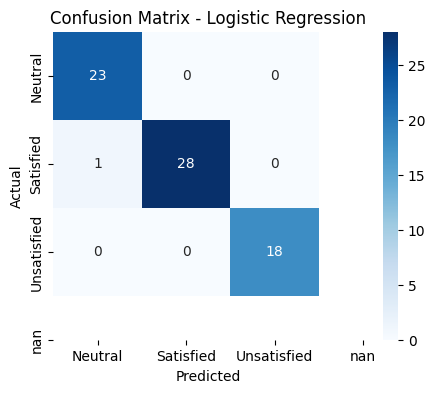

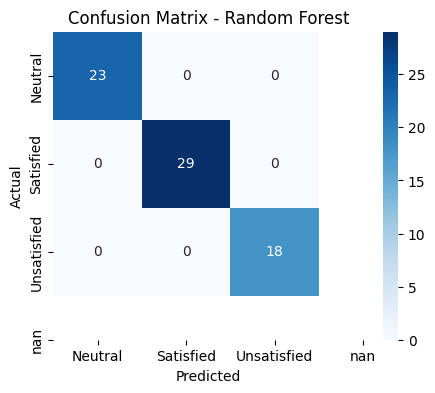

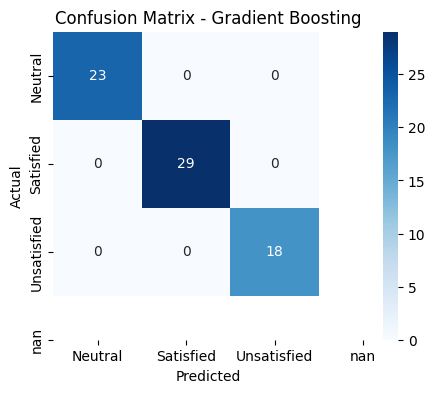

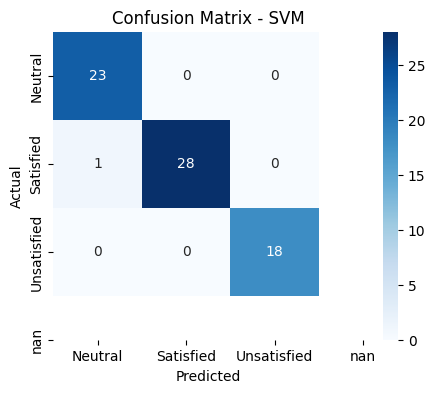

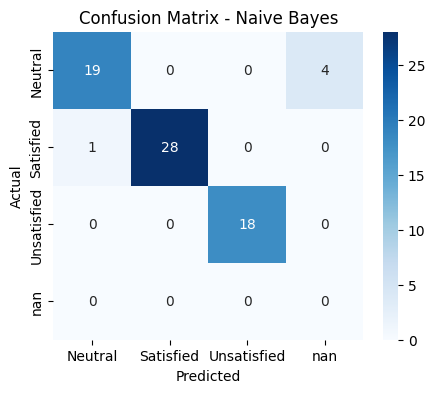

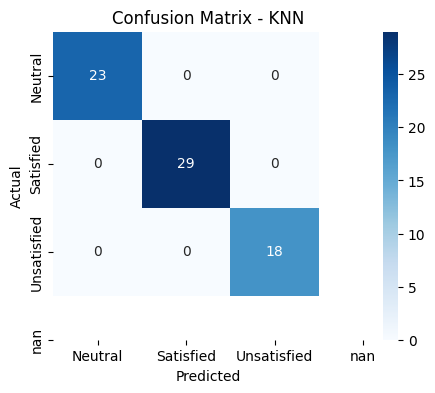

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Plot Confusion Matrix for each model
for name, model in models.items():
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

In [238]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
rf_param_grid = {
    "n_estimators": [50, 100, 200],  
    "max_depth": [None, 10, 20, 30],  
    "min_samples_split": [2, 5, 10],  
    "min_samples_leaf": [1, 2, 4],  
    "bootstrap": [True, False],  
}

# Initialize RandomForest model
rf_model = RandomForestClassifier(random_state=42)

# Perform Randomized Search
start_time = time.time()
rf_tuner = RandomizedSearchCV(
    rf_model, param_distributions=rf_param_grid, 
    n_iter=20, cv=5, random_state=42, n_jobs=-1
)
rf_tuner.fit(X_train, y_train)

# Make Predictions
y_pred_rf_tuned = rf_tuner.predict(X_test)
tuning_duration = time.time() - start_time

# Best Parameters & Score
best_rf_params = rf_tuner.best_params_
best_rf_score = rf_tuner.best_score_

# Print Results
print(f"Best Parameters: {best_rf_params}")
print(f"Best Score: {best_rf_score}")
print(f"Tuning Time: {tuning_duration:.2f} seconds")

c:\Users\yatik\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning:

The least populated class in y has only 1 members, which is less than n_splits=5.



Best Parameters: {'n_estimators': 50, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_depth': 30, 'bootstrap': False}
Best Score: 0.9928571428571429
Tuning Time: 2.49 seconds


In [240]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score

# ✅ Train Original Random Forest
rf_original = RandomForestClassifier(random_state=42)
rf_original.fit(X_train, y_train)
y_pred_original = rf_original.predict(X_test)

# ✅ Train Tuned Random Forest (from previous tuning)
y_pred_tuned = rf_tuner.predict(X_test)

# ✅ Define function to calculate performance metrics
def evaluate_model(y_true, y_pred):
    return {
        "Accuracy": accuracy_score(y_true, y_pred),
        "F1 Score": f1_score(y_true, y_pred, average="weighted"),
        "Recall": recall_score(y_true, y_pred, average="weighted"),
        "Precision": precision_score(y_true, y_pred, average="weighted"),
    }

# ✅ Compute performance for both models
original_rf_metrics = evaluate_model(y_test, y_pred_original)
tuned_rf_metrics = evaluate_model(y_test, y_pred_tuned)

# ✅ Convert results to DataFrame for easy comparison
performance_df = pd.DataFrame({"Original RF": original_rf_metrics, "Tuned RF": tuned_rf_metrics})

# ✅ Display Results
print("Model Performance Comparison (Original vs Tuned RandomForest):")
display(performance_df)

# ✅ Visualize Comparison
import plotly.express as px
fig = px.bar(
    performance_df.T, 
    barmode="group",
    title="Performance Comparison: Original vs Tuned RandomForest",
)
fig.show()

Model Performance Comparison (Original vs Tuned RandomForest):


,Original RF,Tuned RF
Accuracy,1.0,1.0
F1 Score,1.0,1.0
Recall,1.0,1.0
Precision,1.0,1.0


In [243]:
for param, value in best_rf_params.items():
    print(f"✅ {param}: {value}")

✅ n_estimators: 50
✅ min_samples_split: 5
✅ min_samples_leaf: 2
✅ max_depth: 30
✅ bootstrap: False


In [244]:

feature_importances = rf_tuner.best_estimator_.feature_importances_

# Get feature names after preprocessing (One-Hot Encoding adds extra feature names)
feature_names = preprocessor.get_feature_names_out()

# Create a DataFrame for feature importance
feature_importance_df = pd.DataFrame(
    {"Feature": feature_names, "Importance": feature_importances}
).sort_values(by="Importance", ascending=False)

fig = px.bar(
    feature_importance_df,
    x="Feature",
    y="Importance",
    title="Feature Importance (Tuned RandomForest)",
    text=feature_importance_df["Importance"].apply(lambda x: f"{x:.4f}"),
    color="Importance",
    color_continuous_scale="Blues"
)

fig.show()